#Jhillian Millare Cabos

CPE22S3

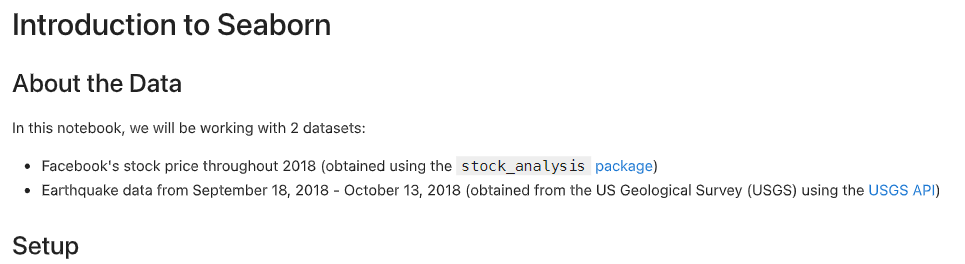

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

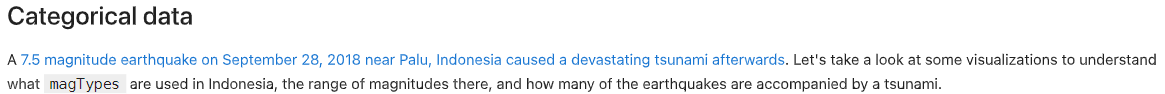

In [ ]:
quakes = pd.read_csv('earthquakes-1.csv')
quakes.assign(
time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
"parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

mag magType                      place  tsunami  \
time                                                                       
2018-09-28 10:02:43.480  7.5     mww  78km N of Palu, Indonesia        1   

                        parsed_place  
time                                  
2018-09-28 10:02:43.480    Indonesia

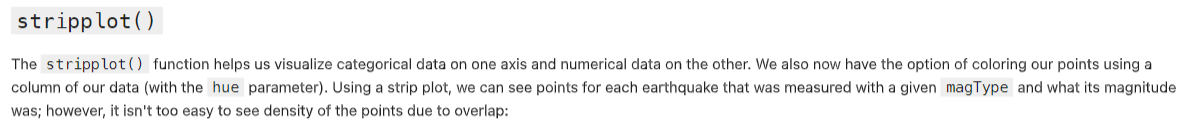

<Axes: xlabel='magType', ylabel='mag'>

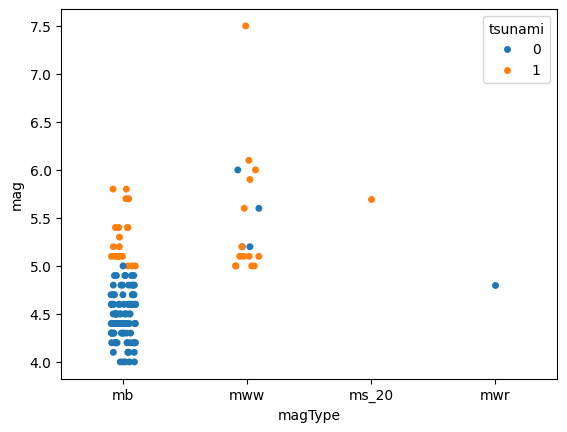

In [ ]:
sns.stripplot(
x='magType',
y='mag',
hue='tsunami',
data=quakes.query('parsed_place == "Indonesia"')
)

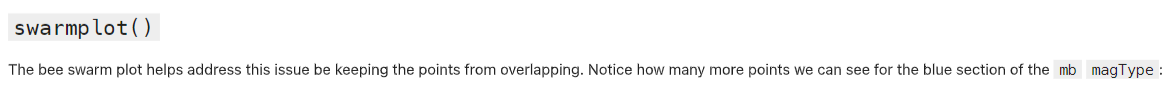

<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


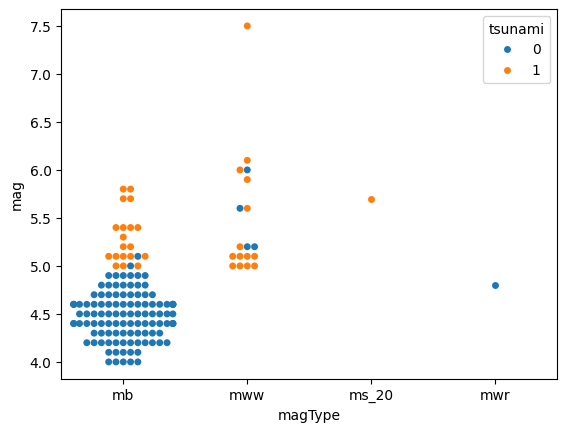

In [ ]:
sns.swarmplot(
x='magType',
y='mag',
hue='tsunami',
data=quakes.query('parsed_place == "Indonesia"')
)

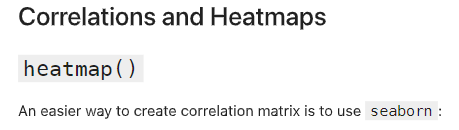

<Axes: >

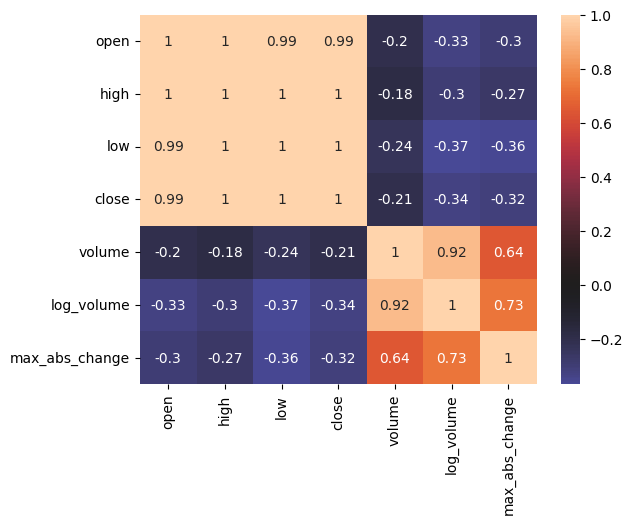

In [ ]:
sns.heatmap(
fb.sort_index().assign(
log_volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
).corr(),
annot=True, center=0
)

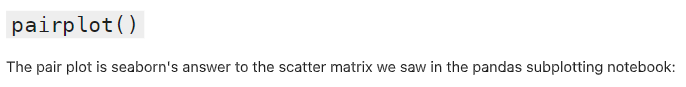

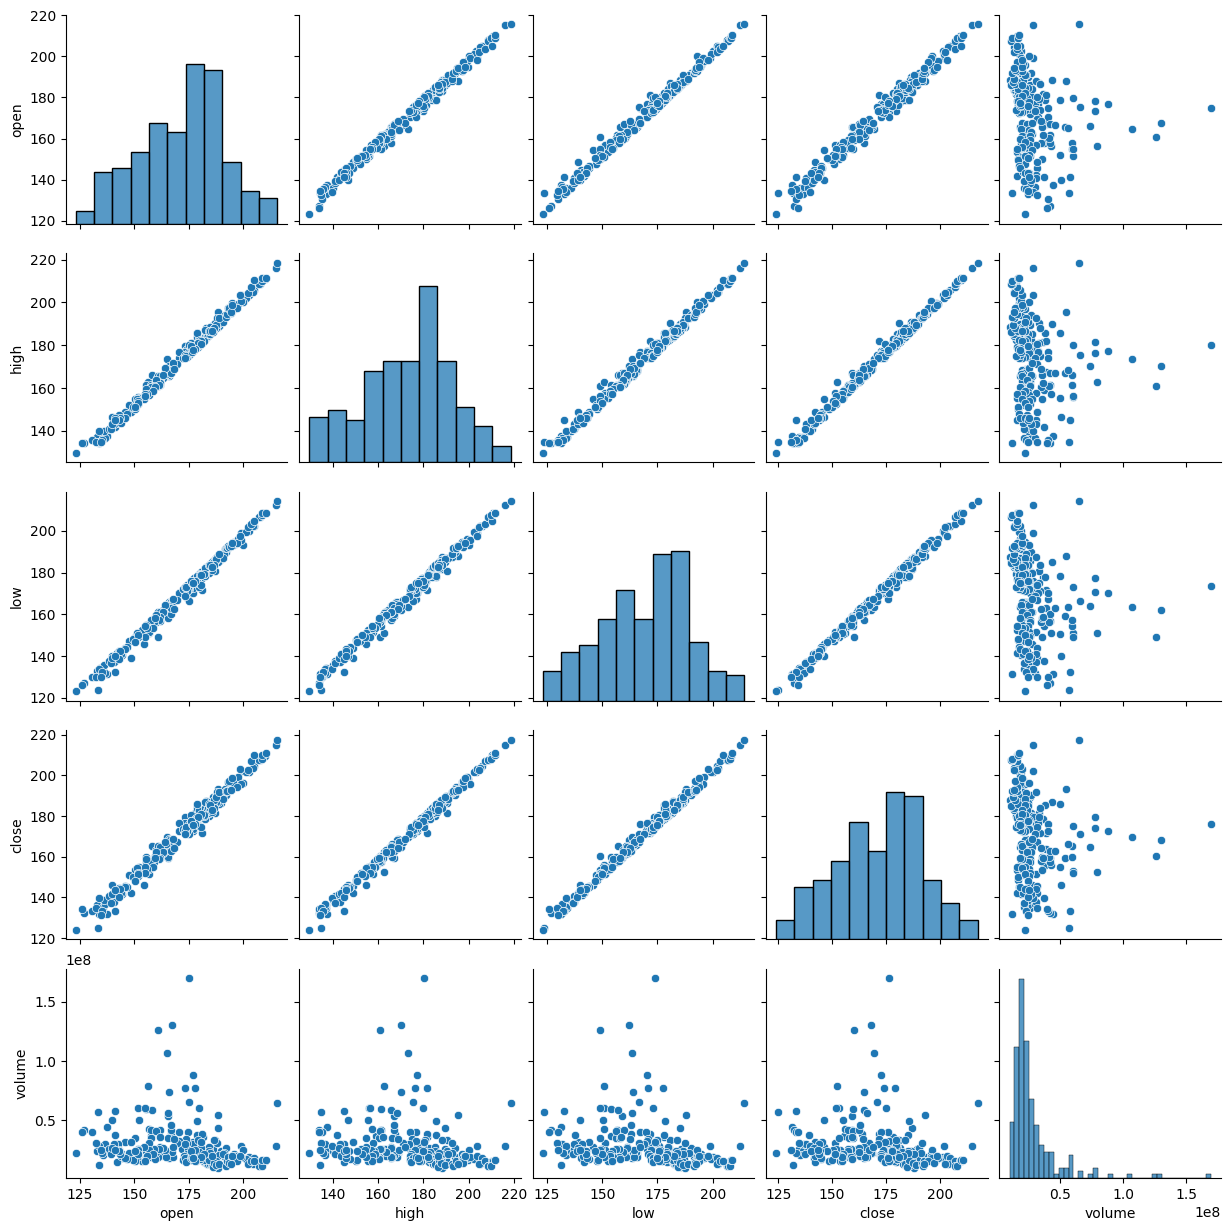

In [ ]:
sns.pairplot(fb)

Just as with pandas we can specify what to show along the diagonal; however, seaborn also allows us to color the data based on another column (or other data with the
same shape):

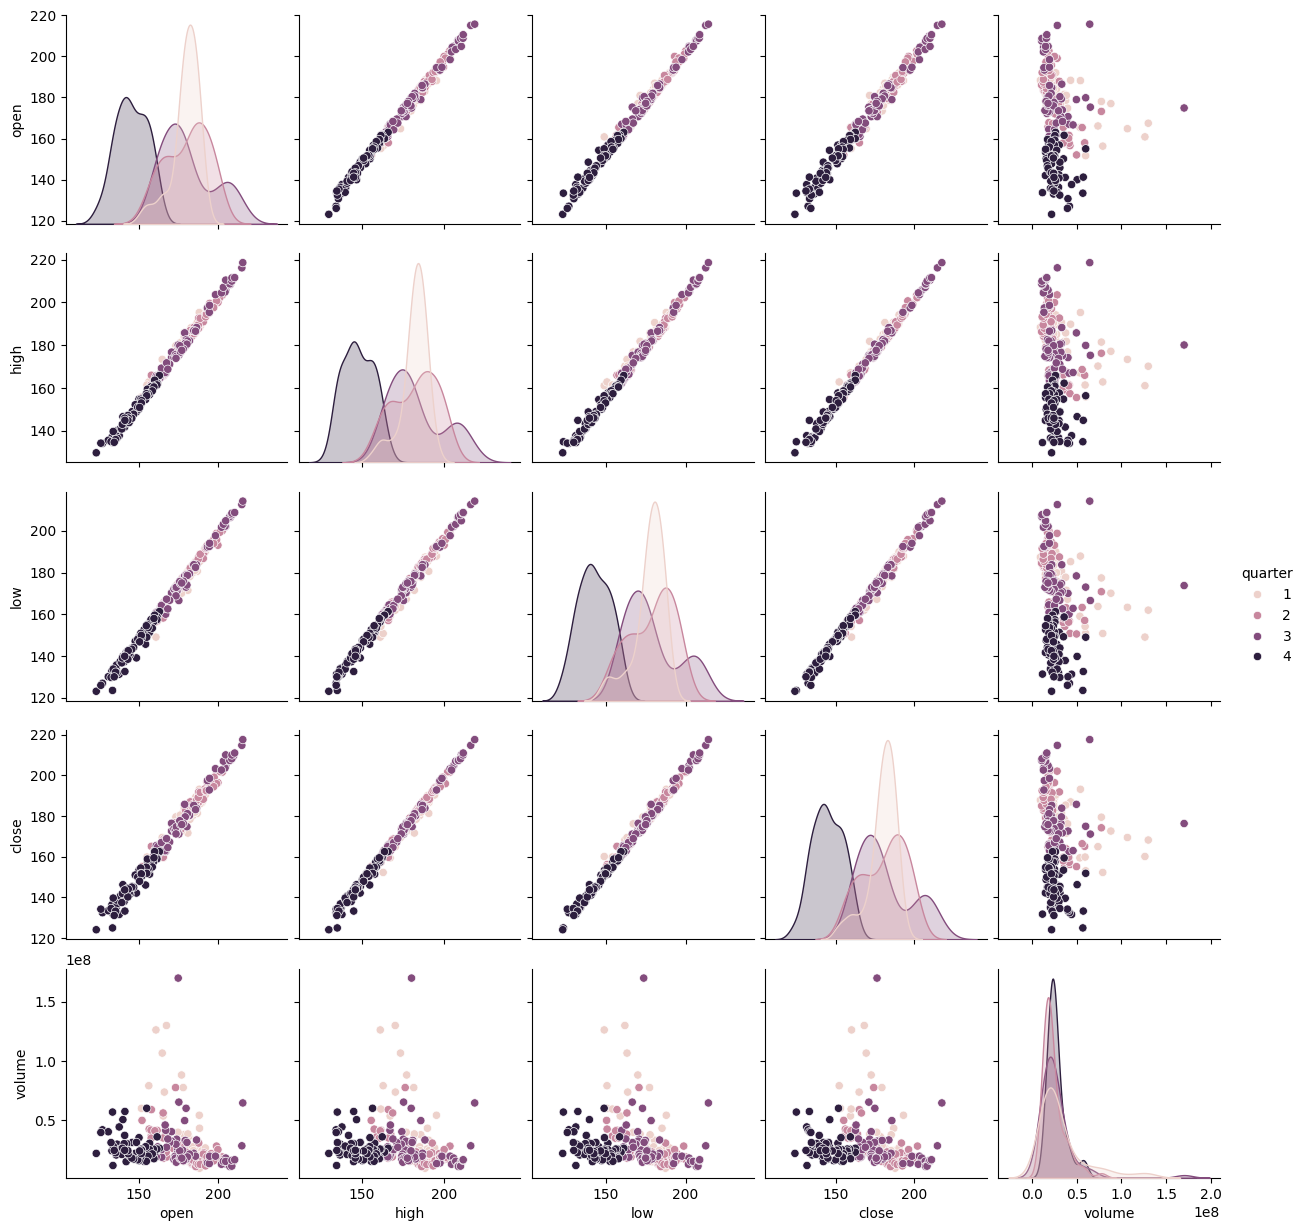

In [ ]:
sns.pairplot(
fb.assign(quarter=lambda x: x.index.quarter),
diag_kind='kde',
hue='quarter'
)

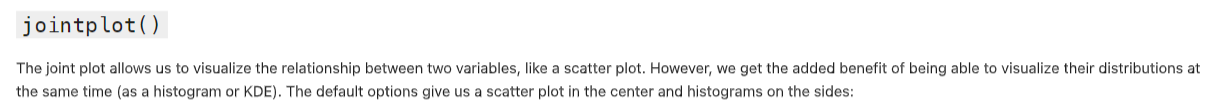

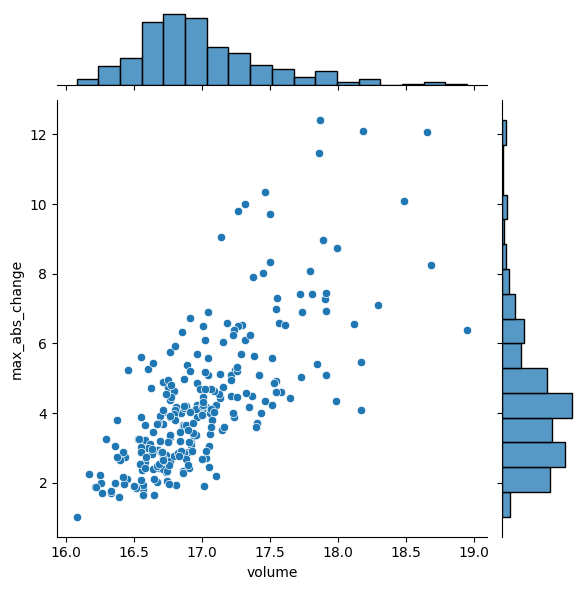

In [ ]:
sns.jointplot(
x='volume',
y='max_abs_change',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

By changing the kind argument, we can change how the center of the plot is displayed. For example, we can pass kind='hex' for hexbins:

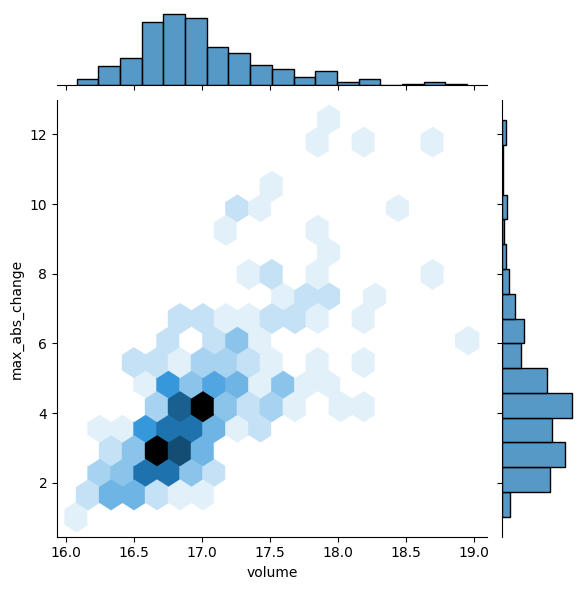

In [ ]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='hex',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

If we specify kind='reg' instead, we get a regression line in the center and KDEs on the sides:

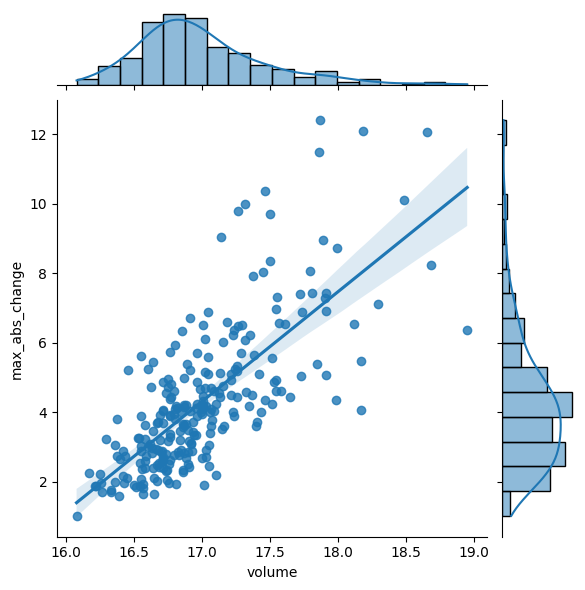

In [ ]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='reg',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

If we pass kind='resid' , we get the residuals from the aforementioned regression:

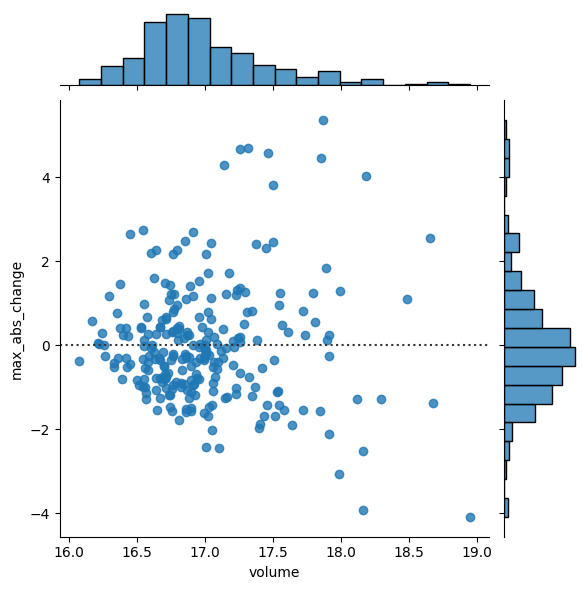

In [ ]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='resid',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

Finally, if we pass kind='kde' , we get a contour plot of the joint density estimate with KDEs along the sides:

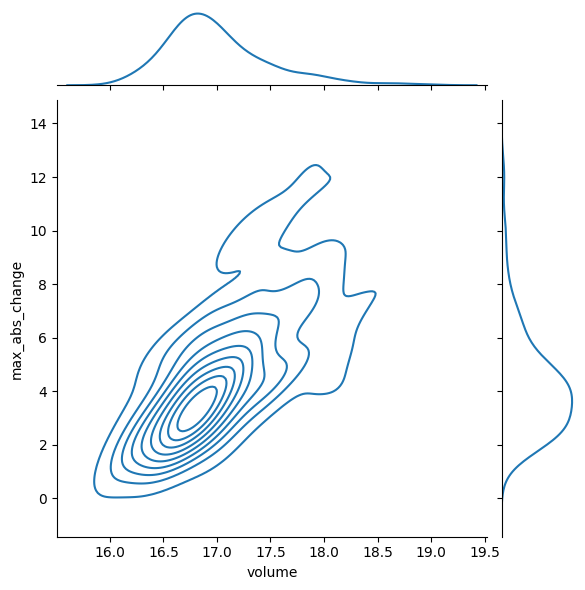

In [ ]:
sns.jointplot(
x='volume',
y='max_abs_change',
kind='kde',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
)
)

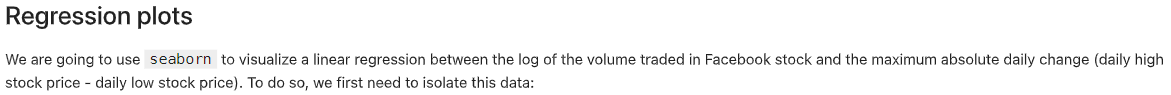

In [ ]:
fb_reg_data = fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
).iloc[:,-2:]

Since we want to visualize each column as the regressor, we need to look at permutations of their order. Permutations and combinations (among other things) are made easy
in Python with itertools , so let's import it

In [ ]:
import itertools

itertools gives us efficient iterators. Iterators are objects that we loop over, exhausting them. This is an iterator from itertools ; notice how the second loop doesn't
do anything:

In [ ]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
  print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
  print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


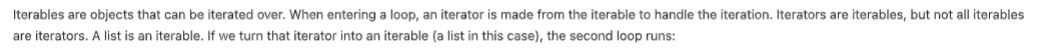

In [ ]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
    print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


The reg_resid_plots() function from the reg_resid_plot.py module in this folder uses regplot() and residplot() from seaborn along with itertools to plot the regression and residuals side-by-side:

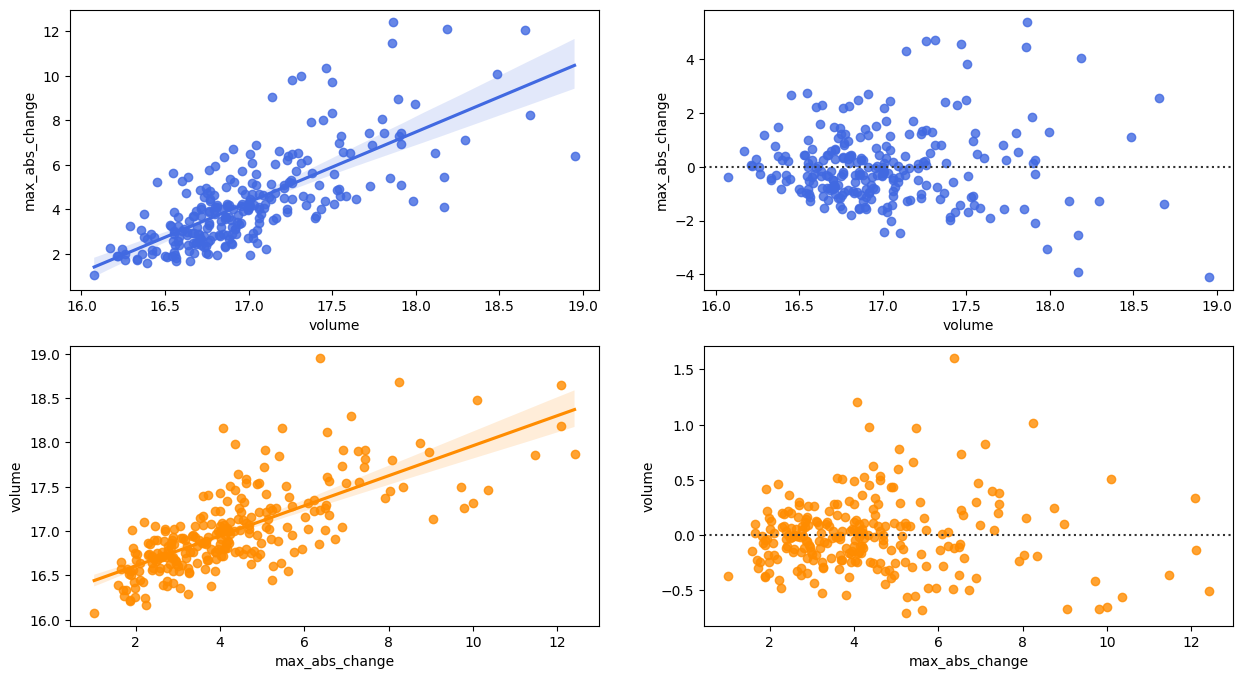

In [ ]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

We can use lmplot() to split our regression across subsets of our data. For example, we can perform a regression per quarter on the Facebook stock data:

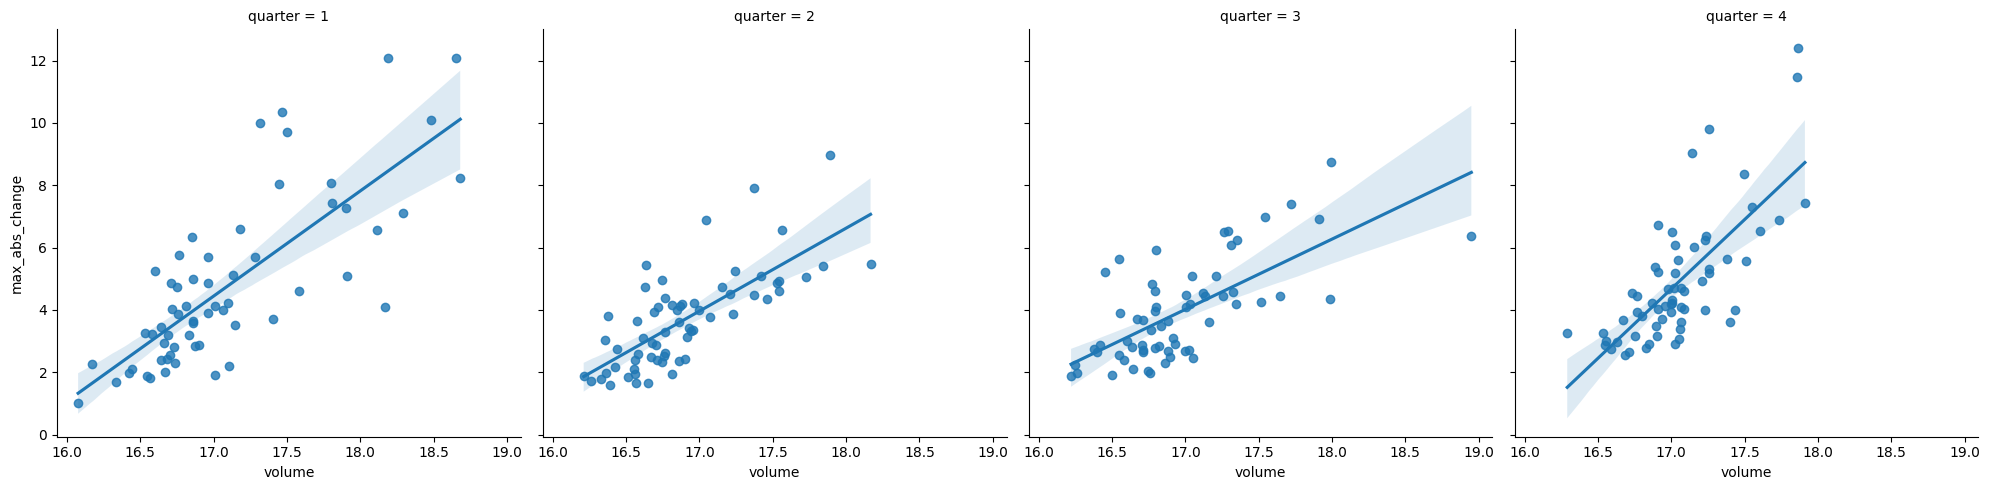

In [ ]:
sns.lmplot(
x='volume',
y='max_abs_change',
data=fb.assign(
volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low,
quarter=lambda x: x.index.quarter
),
col='quarter'
)

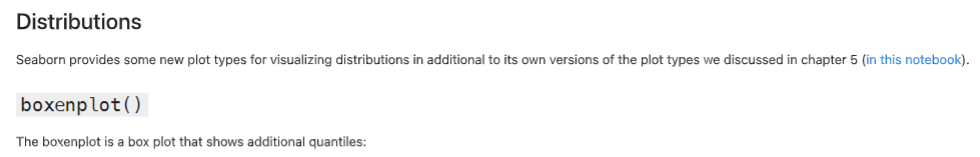

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

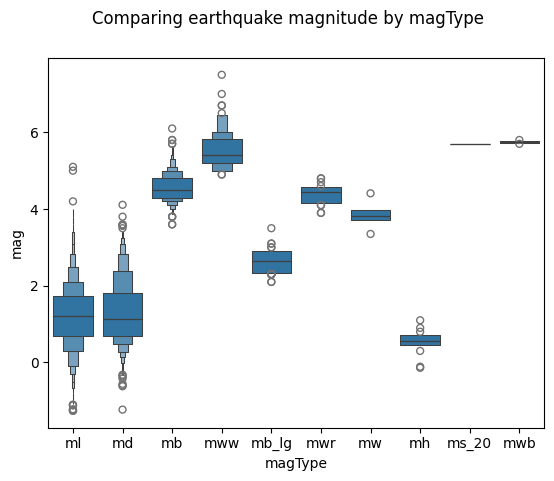

In [ ]:
sns.boxenplot(
x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

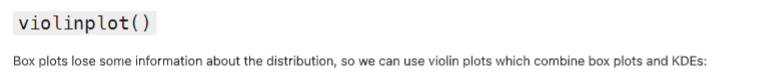

<ipython-input-28-4950d579cebb>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

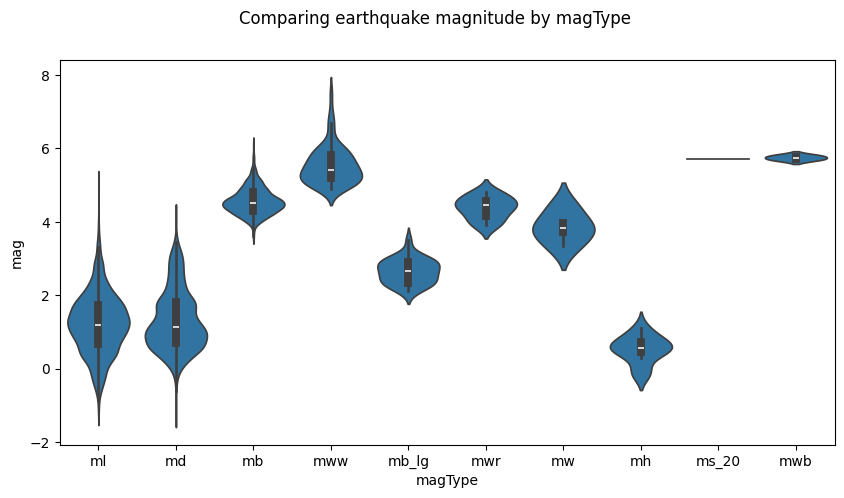

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
x='magType', y='mag', data=quakes[['magType', 'mag']],
ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

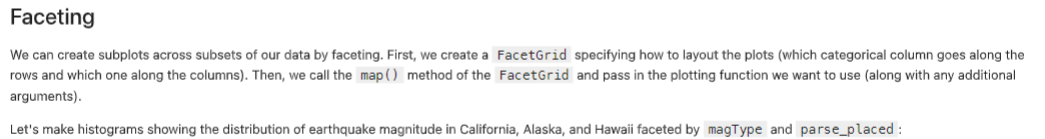

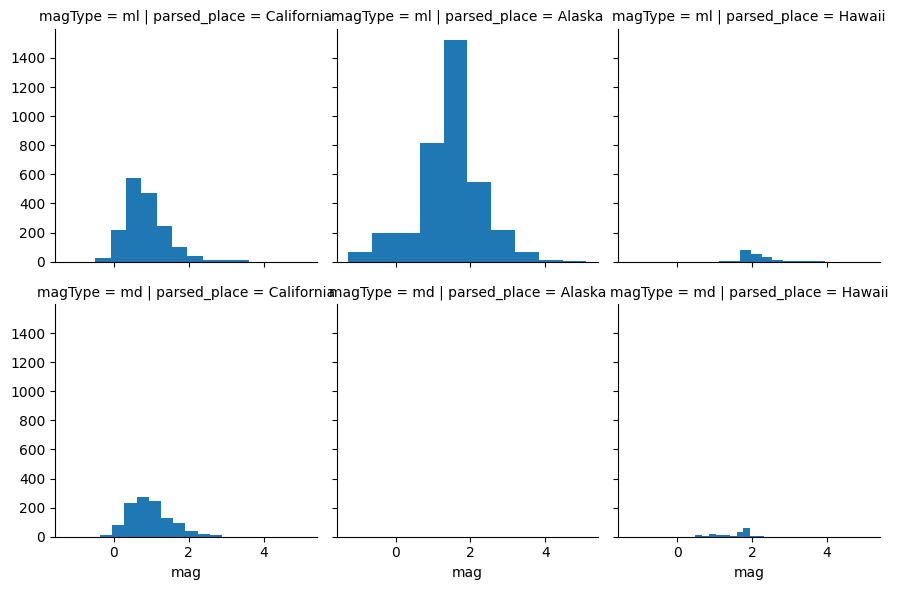

In [ ]:
g = sns.FacetGrid(
quakes[
(quakes.parsed_place.isin([
'California', 'Alaska', 'Hawaii'
]))\
& (quakes.magType.isin(['ml', 'md']))
],
row='magType',
col='parsed_place'
)
g = g.map(plt.hist, 'mag')

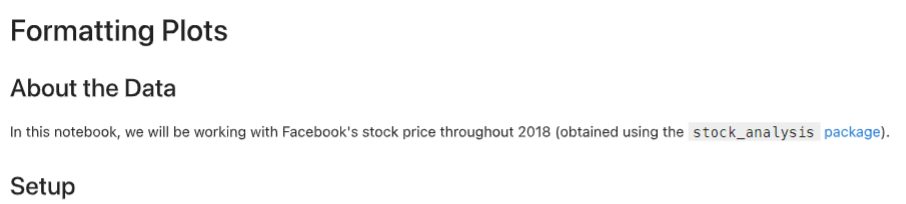

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

Text(0, 0.5, 'price ($)')

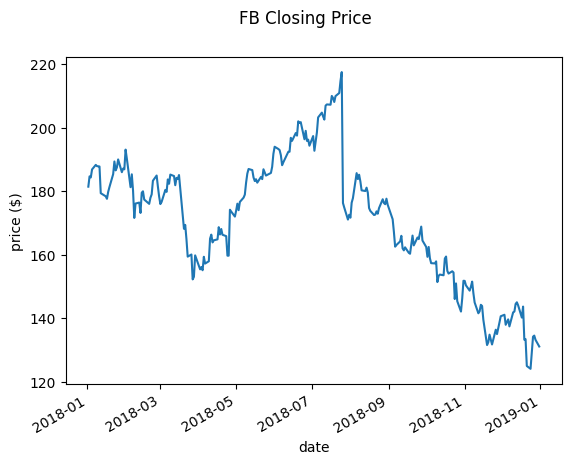

In [ ]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

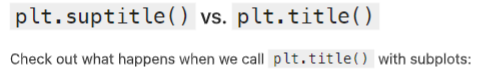

Text(0, 0.5, 'price ($)')

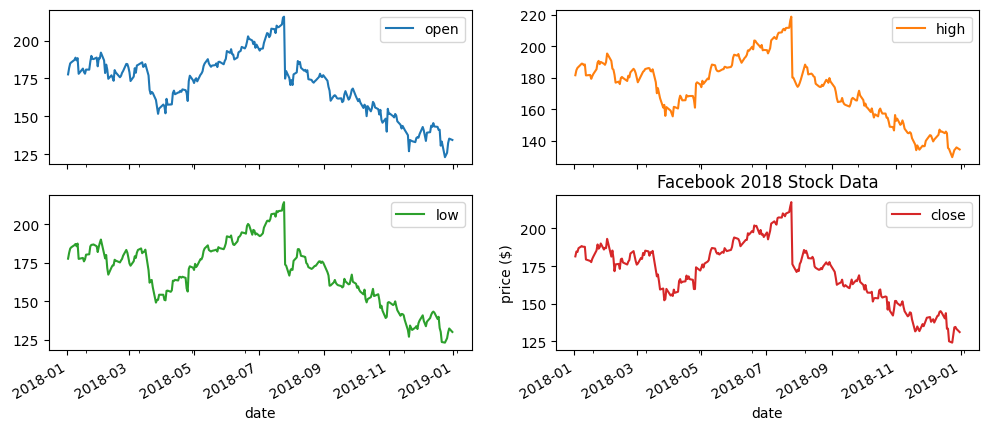

In [ ]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Simply getting into the habit of using plt.suptitle() instead of plt.title() will save you this confusion:

Text(0, 0.5, 'price ($)')

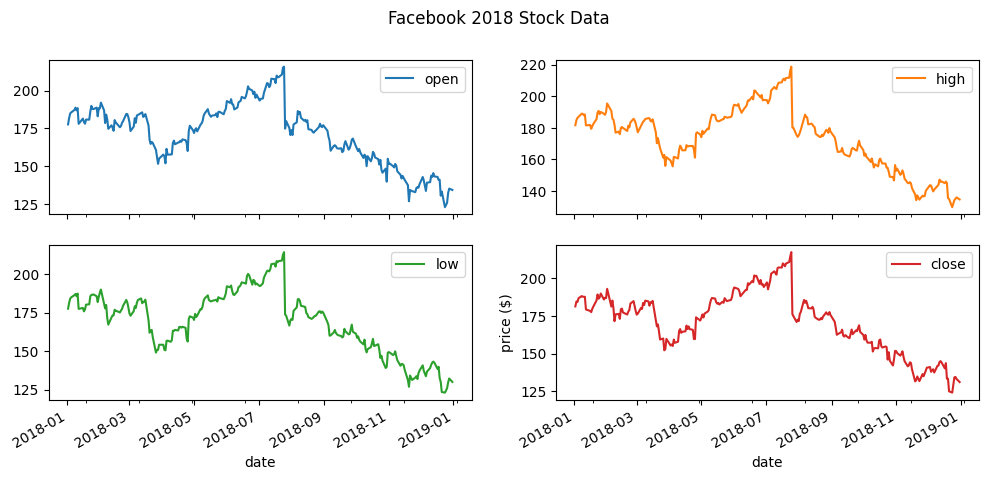

In [ ]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

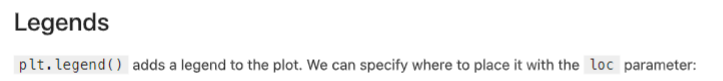

Text(0, 0.5, 'price ($)')

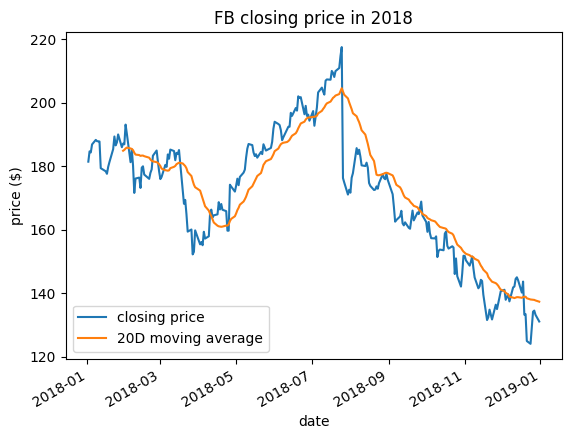

In [ ]:
fb.assign(
ma=lambda x: x.close.rolling(20).mean()
).plot(
y=['close', 'ma'],
title='FB closing price in 2018',
label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

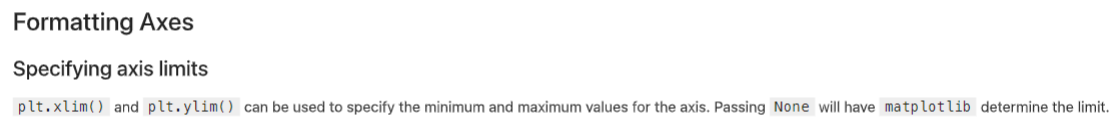

Text(0, 0.5, 'price ($)')

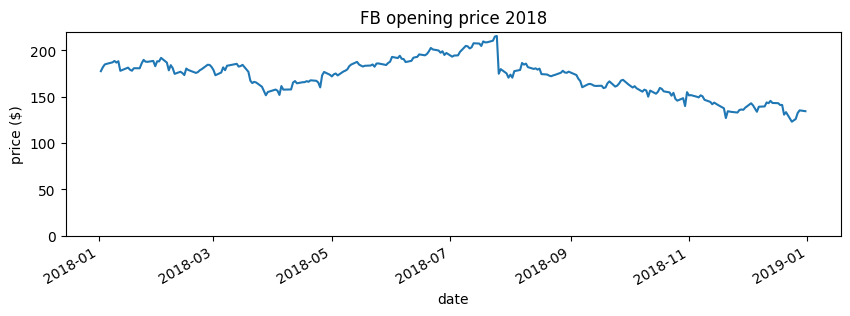

In [ ]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

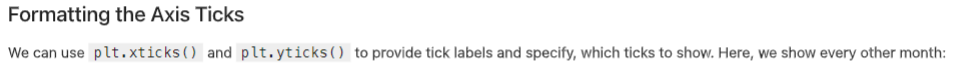

In [ ]:
import calendar

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

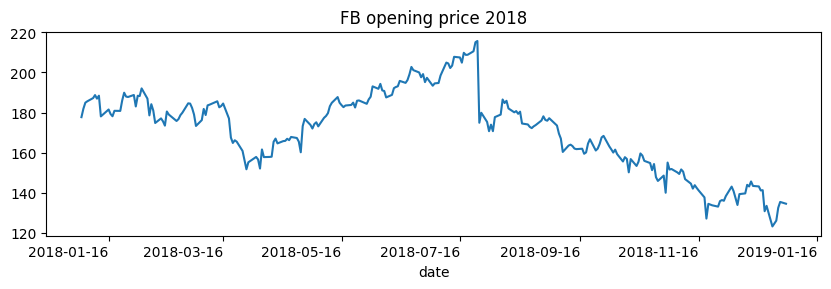

In [ ]:
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')

Using tickerIn
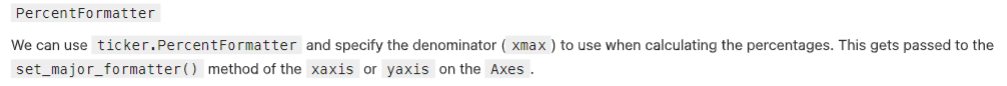

Text(0, 0.5, 'percent of highest price ($218.62)')

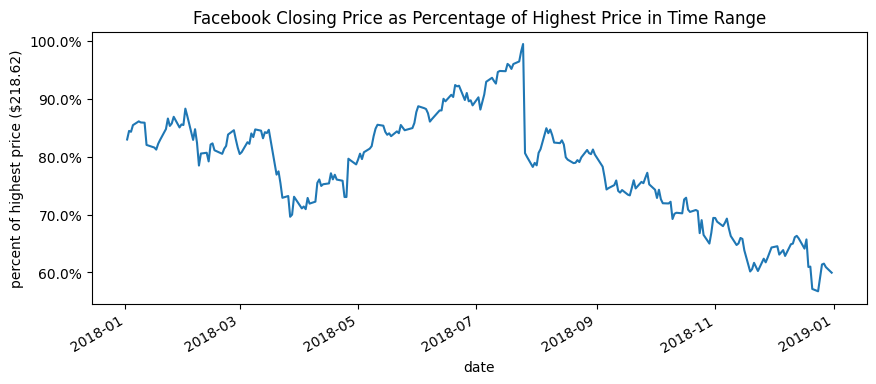

In [ ]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
figsize=(10, 4),
title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

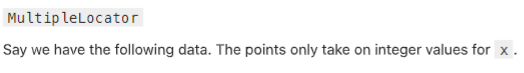

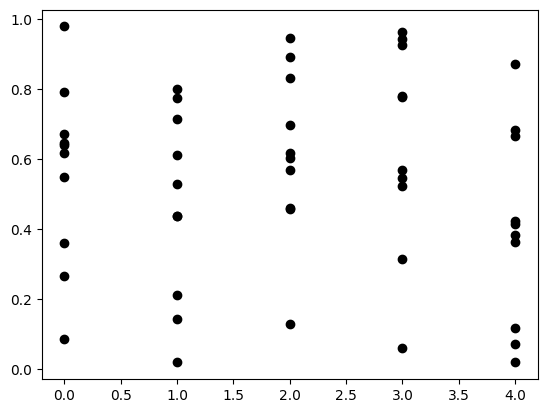

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

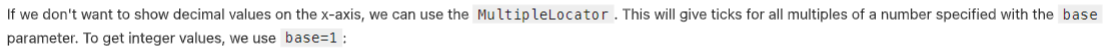

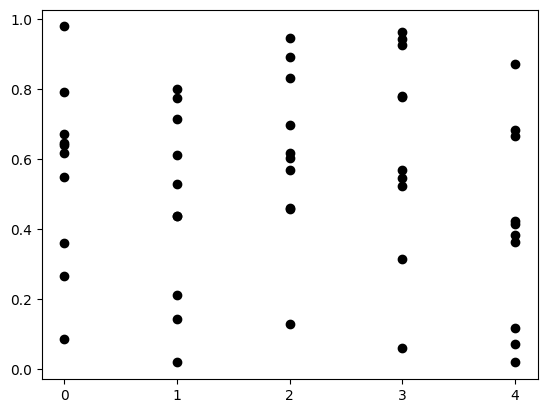

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
ticker.MultipleLocator(base=1)
)

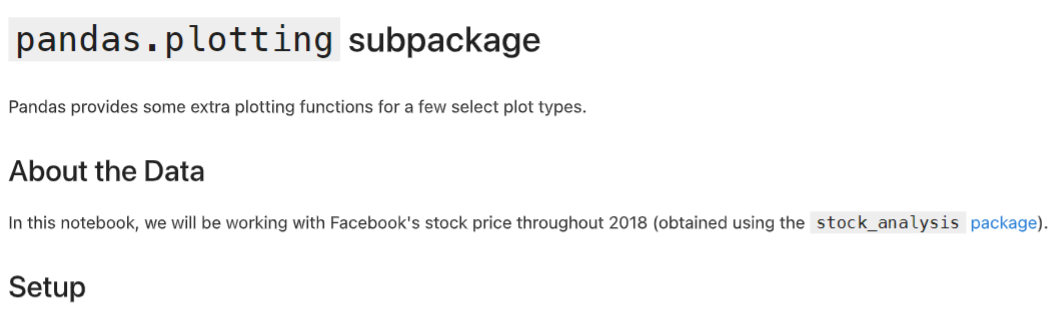

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

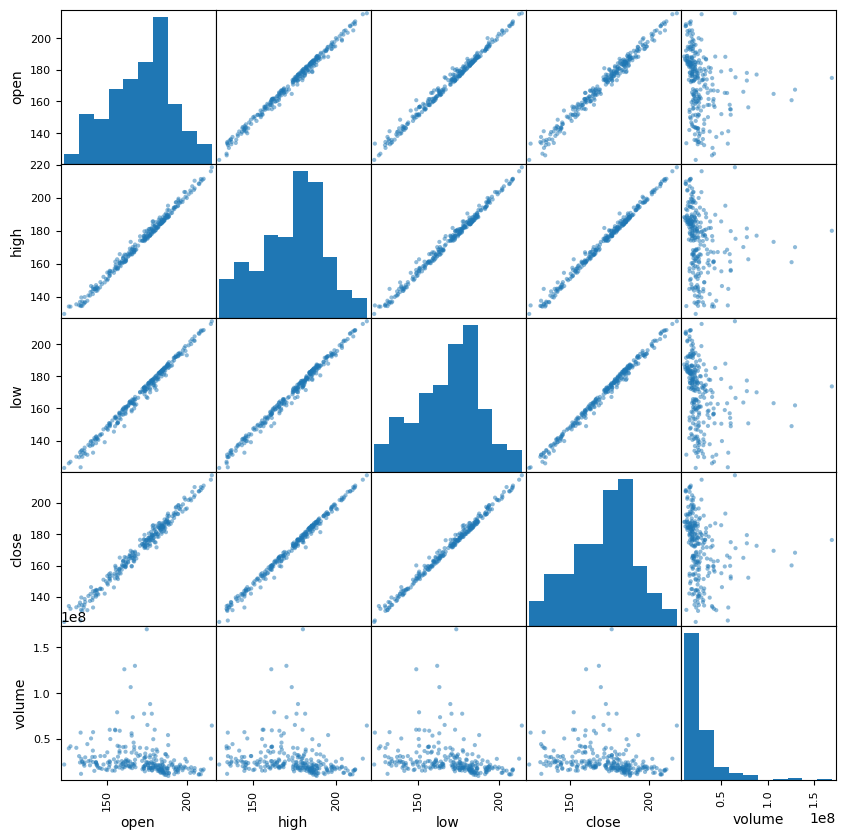

In [ ]:
#Scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

Changing the diagonal from histograms to KDE:

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

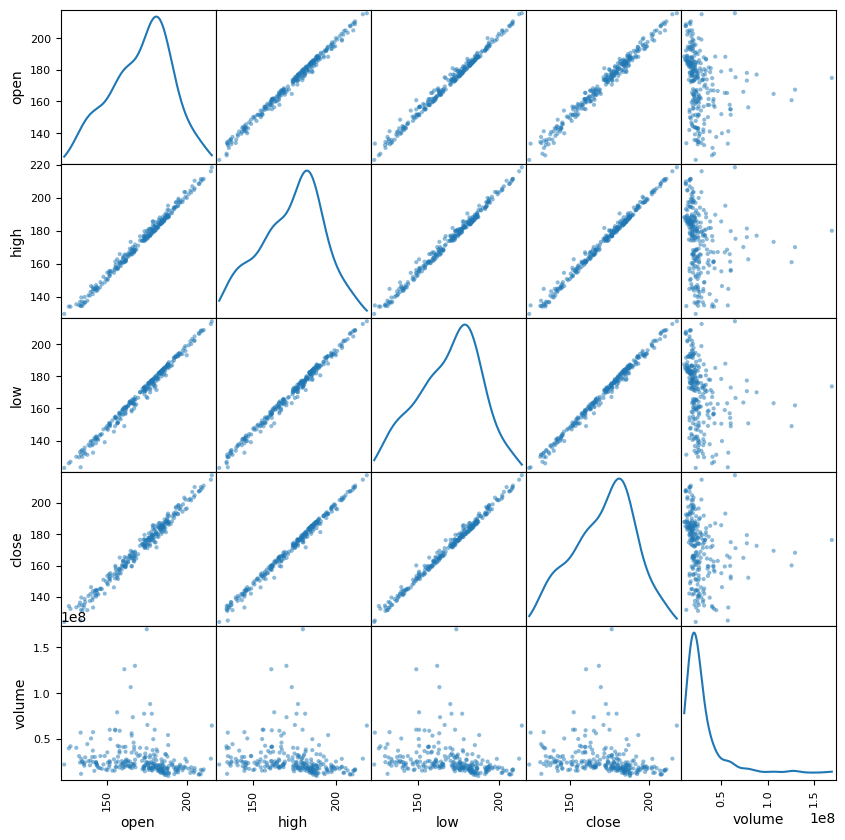

In [ ]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

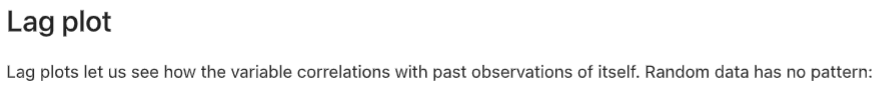

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

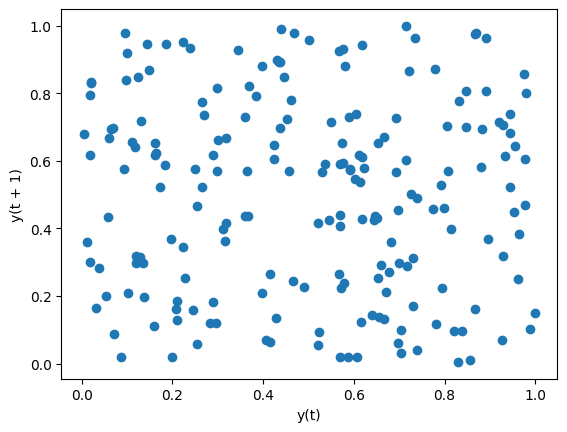

In [ ]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

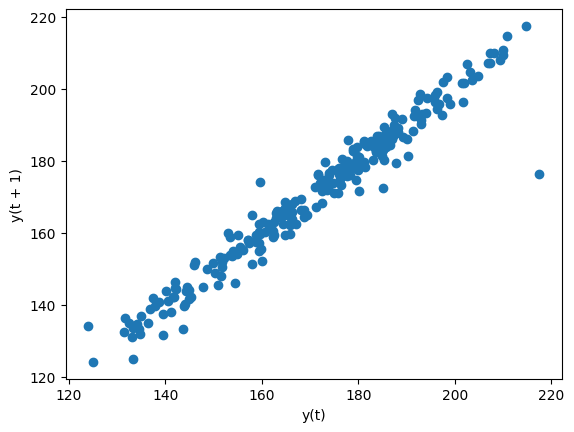

In [ ]:
lag_plot(fb.close)

The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a week of trading activity):

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

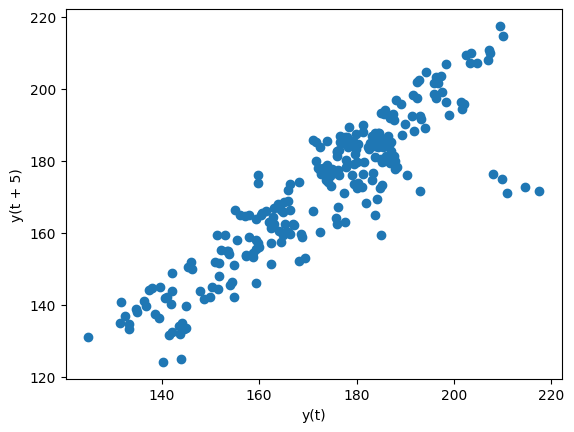

In [ ]:
lag_plot(fb.close, lag=5)

Autocorrelation plots


We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the
bounds below):

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

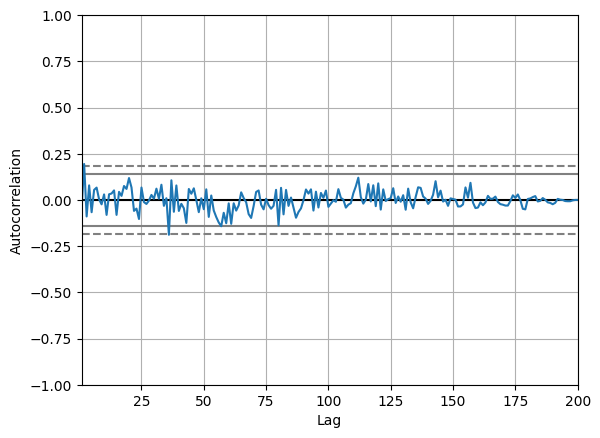

In [ ]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

Stock data, on the other hand, does have significant autocorrelation:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

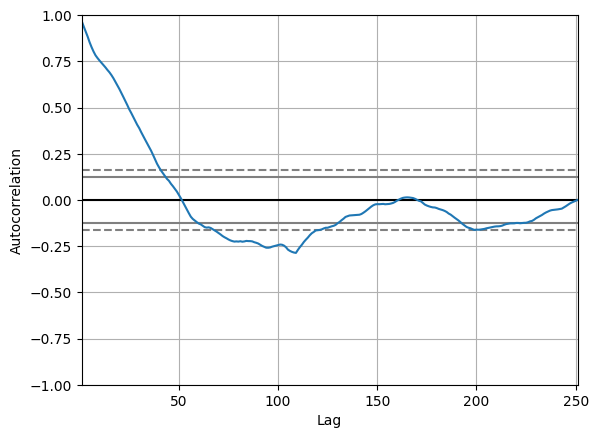

In [ ]:
autocorrelation_plot(fb.close)

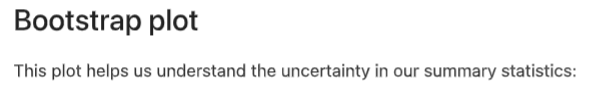

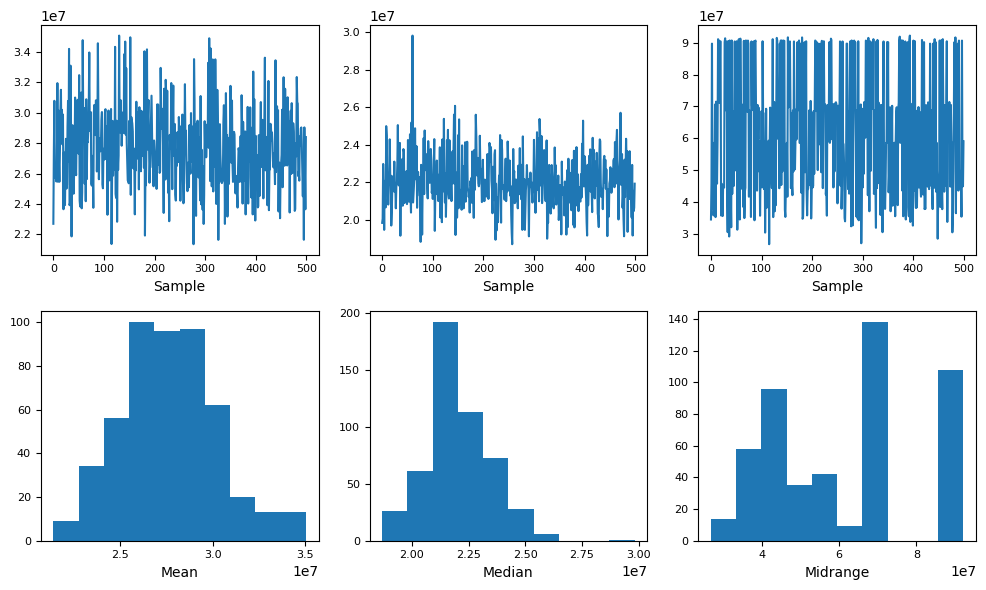

In [ ]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))



---

**Supplementary**

Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

now we get our dataset

In [5]:
quakes = pd.read_csv('earthquakes.csv')

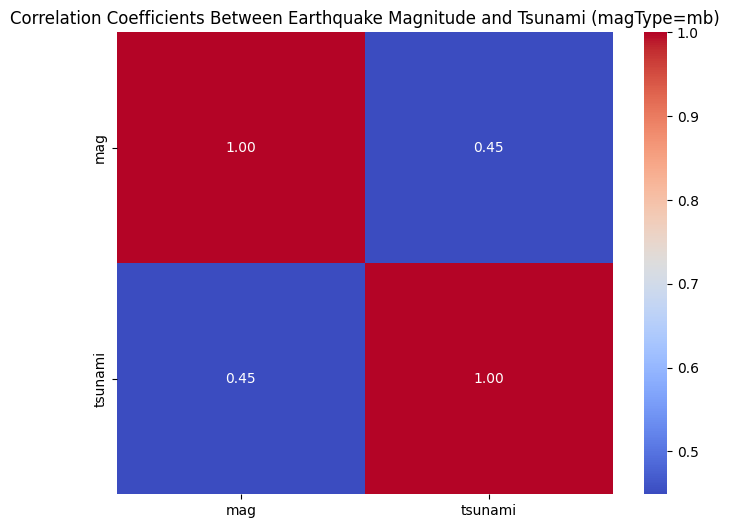

In [6]:
#filter the magType
mb_earthquakes = quakes[quakes['magType'] == 'mb']

#correlation matrix
correlation_matrix = mb_earthquakes[['mag', 'tsunami']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Coefficients Between Earthquake Magnitude and Tsunami (magType=mb)')
plt.show()


Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

I had to import the fb_data using fb_stock_prices_2018

In [10]:
fb_data = pd.read_csv('fb_stock_prices_2018.csv')

In [12]:
# Calculate the quartiles and IQR for volume traded and closing prices
volume_quartiles = fb_data['volume'].quantile([0.25, 0.75])
volume_q1 = volume_quartiles.loc[0.25]
volume_q3 = volume_quartiles.loc[0.75]
volume_iqr = volume_q3 - volume_q1

close_quartiles = fb_data['close'].quantile([0.25, 0.75])
close_q1 = close_quartiles.loc[0.25]
close_q3 = close_quartiles.loc[0.75]
close_iqr = close_q3 - close_q1


In [13]:
# calculating the Tukey fence bounds
volume_fence_lower = volume_q1 - 1.5 * volume_iqr
volume_fence_upper = volume_q3 + 1.5 * volume_iqr

close_fence_lower = close_q1 - 1.5 * close_iqr
close_fence_upper = close_q3 + 1.5 * close_iqr


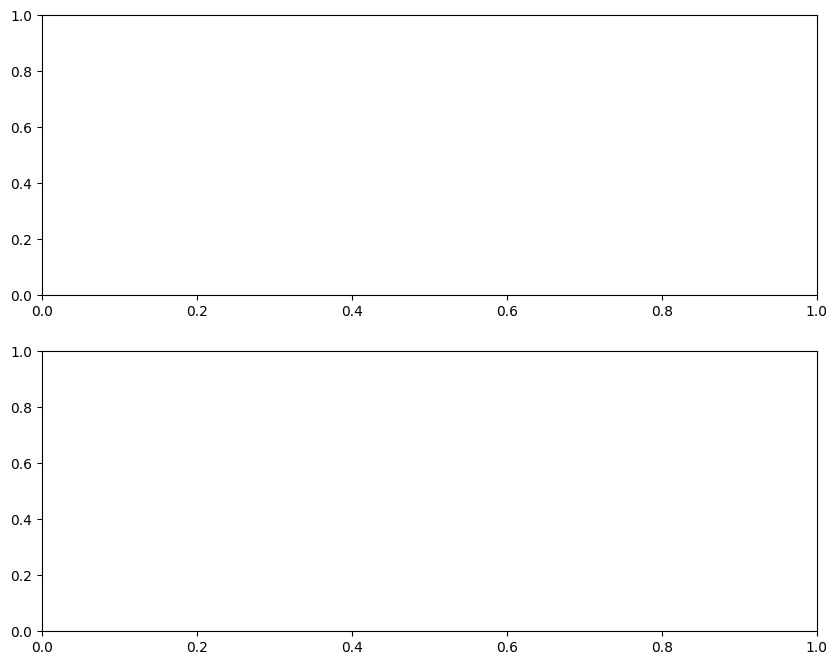

In [14]:
# creating subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))


In [15]:
# box plot for volume traded
axs[0].boxplot(fb_data['volume'], vert=False)
axs[0].axvline(volume_fence_lower, color='r', linestyle='--', label='Lower Tukey Fence')
axs[0].axvline(volume_fence_upper, color='r', linestyle='--', label='Upper Tukey Fence')
axs[0].set_title('Box Plot of Facebook Volume Traded')
axs[0].set_xlabel('Volume')
axs[0].set_ylabel('Distribution')
axs[0].legend()

In [16]:
# closing prices
axs[1].boxplot(fb_data['close'], vert=False)
axs[1].axvline(close_fence_lower, color='r', linestyle='--', label='Lower Tukey Fence')
axs[1].axvline(close_fence_upper, color='r', linestyle='--', label='Upper Tukey Fence')
axs[1].set_title('Box Plot of Facebook Closing Prices')
axs[1].set_xlabel('Closing Price')
axs[1].set_ylabel('Distribution')
axs[1].legend()

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Now, I'm realizing it doesnt work if its separately done

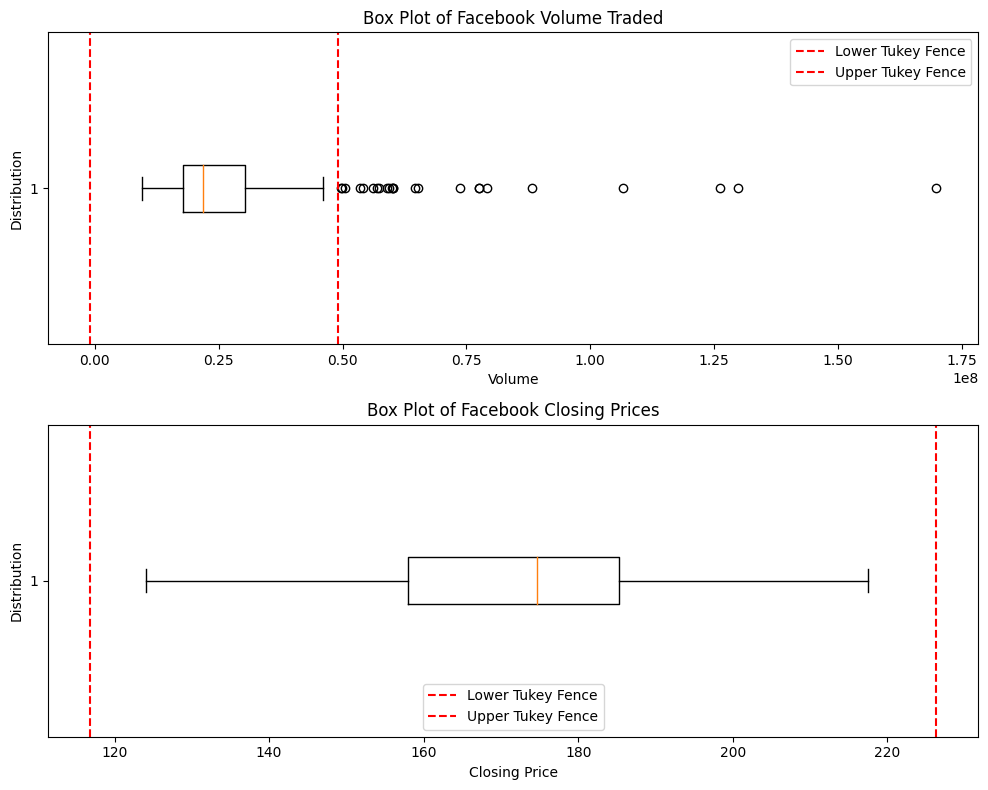

In [18]:
volume_quartiles = fb_data['volume'].quantile([0.25, 0.75])
volume_q1 = volume_quartiles.loc[0.25]
volume_q3 = volume_quartiles.loc[0.75]
volume_iqr = volume_q3 - volume_q1
close_quartiles = fb_data['close'].quantile([0.25, 0.75])
close_q1 = close_quartiles.loc[0.25]
close_q3 = close_quartiles.loc[0.75]
close_iqr = close_q3 - close_q1
volume_fence_lower = volume_q1 - 1.5 * volume_iqr
volume_fence_upper = volume_q3 + 1.5 * volume_iqr
close_fence_lower = close_q1 - 1.5 * close_iqr
close_fence_upper = close_q3 + 1.5 * close_iqr
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].boxplot(fb_data['volume'], vert=False)
axs[0].axvline(volume_fence_lower, color='r', linestyle='--', label='Lower Tukey Fence')
axs[0].axvline(volume_fence_upper, color='r', linestyle='--', label='Upper Tukey Fence')
axs[0].set_title('Box Plot of Facebook Volume Traded')
axs[0].set_xlabel('Volume')
axs[0].set_ylabel('Distribution')
axs[0].legend()
axs[1].boxplot(fb_data['close'], vert=False)
axs[1].axvline(close_fence_lower, color='r', linestyle='--', label='Lower Tukey Fence')
axs[1].axvline(close_fence_upper, color='r', linestyle='--', label='Upper Tukey Fence')
axs[1].set_title('Box Plot of Facebook Closing Prices')
axs[1].set_xlabel('Closing Price')
axs[1].set_ylabel('Distribution')
axs[1].legend()
plt.tight_layout()
plt.show()

Fill in the area between the bounds in the plot from exercise #2.

In [19]:
axs[0].fill_betweenx([0, 1], volume_fence_lower, volume_fence_upper, color='gray', alpha=0.3)
axs[1].fill_betweenx([0, 1], close_fence_lower, close_fence_upper, color='gray', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Yes, I forgot about it

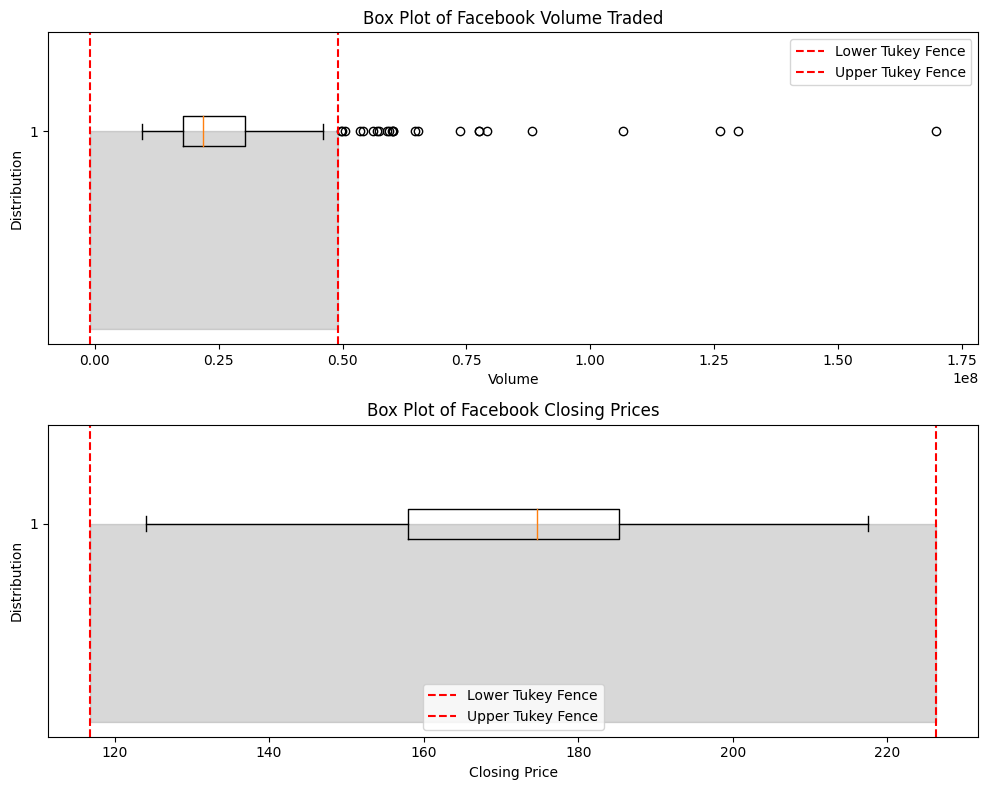

In [20]:
volume_quartiles = fb_data['volume'].quantile([0.25, 0.75])
volume_q1 = volume_quartiles.loc[0.25]
volume_q3 = volume_quartiles.loc[0.75]
volume_iqr = volume_q3 - volume_q1
close_quartiles = fb_data['close'].quantile([0.25, 0.75])
close_q1 = close_quartiles.loc[0.25]
close_q3 = close_quartiles.loc[0.75]
close_iqr = close_q3 - close_q1
volume_fence_lower = volume_q1 - 1.5 * volume_iqr
volume_fence_upper = volume_q3 + 1.5 * volume_iqr
close_fence_lower = close_q1 - 1.5 * close_iqr
close_fence_upper = close_q3 + 1.5 * close_iqr
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].boxplot(fb_data['volume'], vert=False)
axs[0].axvline(volume_fence_lower, color='r', linestyle='--', label='Lower Tukey Fence')
axs[0].axvline(volume_fence_upper, color='r', linestyle='--', label='Upper Tukey Fence')
axs[0].set_title('Box Plot of Facebook Volume Traded')
axs[0].set_xlabel('Volume')
axs[0].set_ylabel('Distribution')
axs[0].legend()
axs[1].boxplot(fb_data['close'], vert=False)
axs[1].axvline(close_fence_lower, color='r', linestyle='--', label='Lower Tukey Fence')
axs[1].axvline(close_fence_upper, color='r', linestyle='--', label='Upper Tukey Fence')
axs[1].set_title('Box Plot of Facebook Closing Prices')
axs[1].set_xlabel('Closing Price')
axs[1].set_ylabel('Distribution')
axs[1].legend()
axs[0].fill_betweenx([0, 1], volume_fence_lower, volume_fence_upper, color='gray', alpha=0.3)
axs[1].fill_betweenx([0, 1], close_fence_lower, close_fence_upper, color='gray', alpha=0.3)
plt.tight_layout()
plt.show()

^ I wonder if this is okay

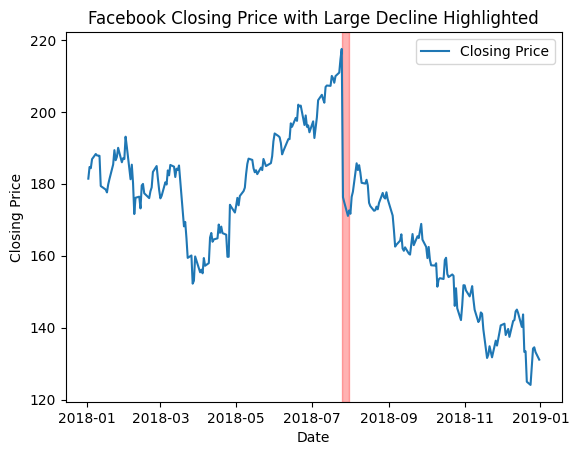

In [22]:
fb_data['date'] = pd.to_datetime(fb_data['date'])
fb_data.set_index('date', inplace=True)
decline_data = fb_data['2018-07-25':'2018-07-31']
plt.plot(fb_data.index, fb_data['close'], label='Closing Price')
plt.axvspan('2018-07-25', '2018-07-31', color='red', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Closing Price with Large Decline Highlighted')
plt.legend()
plt.show()

 I now know to set the datetime column as the index to enable efficient slicing by date ranges in pandas DataFrame.

In [28]:
fb_data

open    high       low   close    volume
date                                                  
2018-01-02  177.68  181.58  177.5500  181.42  18151903
2018-01-03  181.88  184.78  181.3300  184.67  16886563
2018-01-04  184.90  186.21  184.0996  184.33  13880896
2018-01-05  185.59  186.90  184.9300  186.85  13574535
2018-01-08  187.20  188.90  186.3300  188.28  17994726
...            ...     ...       ...     ...       ...
2018-12-24  123.10  129.74  123.0200  124.06  22066002
2018-12-26  126.00  134.24  125.8900  134.18  39723370
2018-12-27  132.44  134.99  129.6700  134.52  31202509
2018-12-28  135.34  135.92  132.2000  133.20  22627569
2018-12-31  134.45  134.64  129.9500  131.09  24625308

[251 rows x 5 columns]

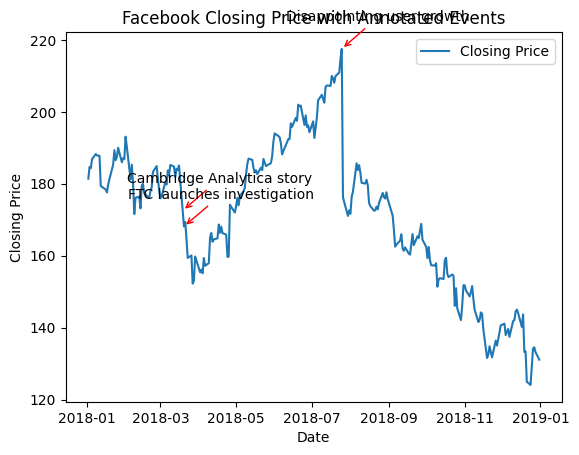

In [41]:
fb_data.index = pd.to_datetime(fb_data.index)
events = {
    'Disappointing user growth': '2018-07-25',
    'Cambridge Analytica story': '2018-03-19',
    'FTC launches investigation': '2018-03-20'
}
plt.plot(fb_data.index, fb_data['close'], label='Closing Price')
for event, date in events.items():
    plt.annotate(event, xy=(pd.to_datetime(date), fb_data.loc[date, 'close']), xytext=(-40, 20),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Facebook Closing Price with Annotated Events')
plt.legend()
plt.show()


Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

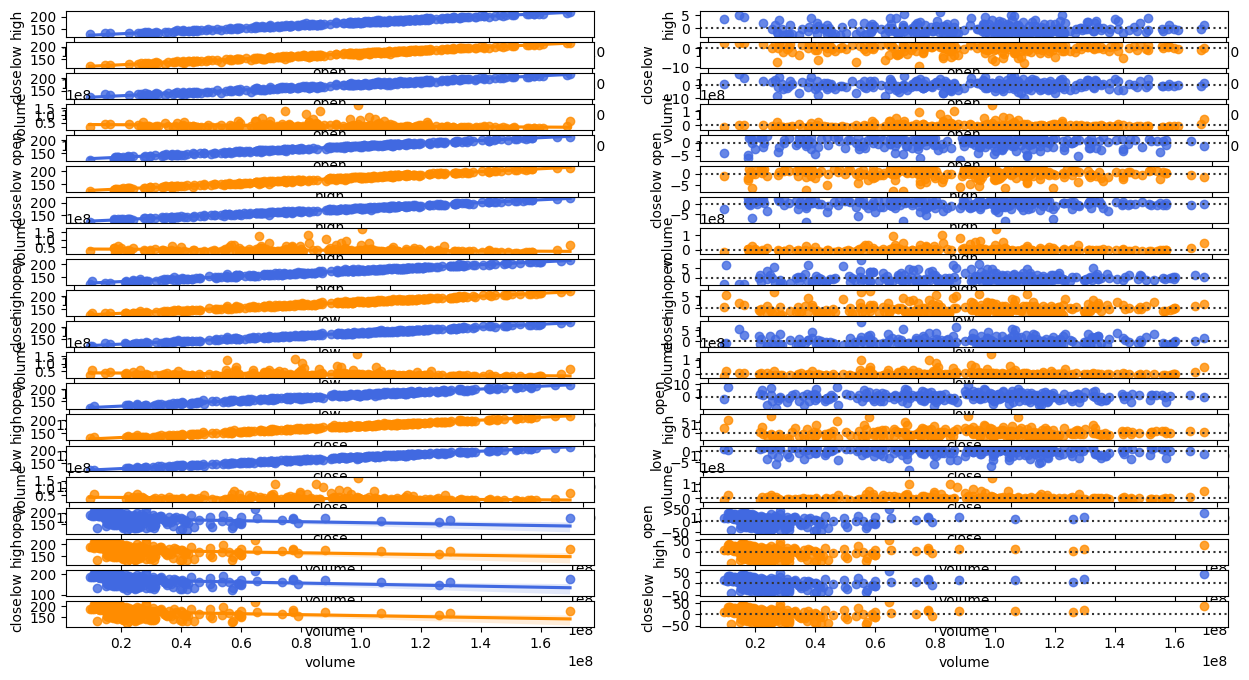

In [49]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_data)

Through the exercise of modifying and utilizing the `reg_resid_plots` function, I gained a deeper understanding of regression analysis visualization techniques. Specifically, I learned how to create regression and residual plots for various combinations of variables in a dataset using seaborn and matplotlib. Additionally, I learned about the itertools library for iterating through permutations efficiently. Though ofcourse, I did struggle and wasn't sure if I was doing it right.